In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Insurance Claims Charges Prediction**

## Importing Libraries & Data Set

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
insdata = pd.read_csv('/content/insurance.csv')

## Exploratory Data Analysis (EDA)

In [ ]:
insdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print('Dimensions: {} Rows and {} Columns '.format(insdata.shape[0], insdata.shape[1]))

Dimensions: 1338 Rows and 7 Columns 


In [ ]:
insdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insdata.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
insdata['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


### Visulizations

Text(0.5, 1.0, 'Age vs Charges')

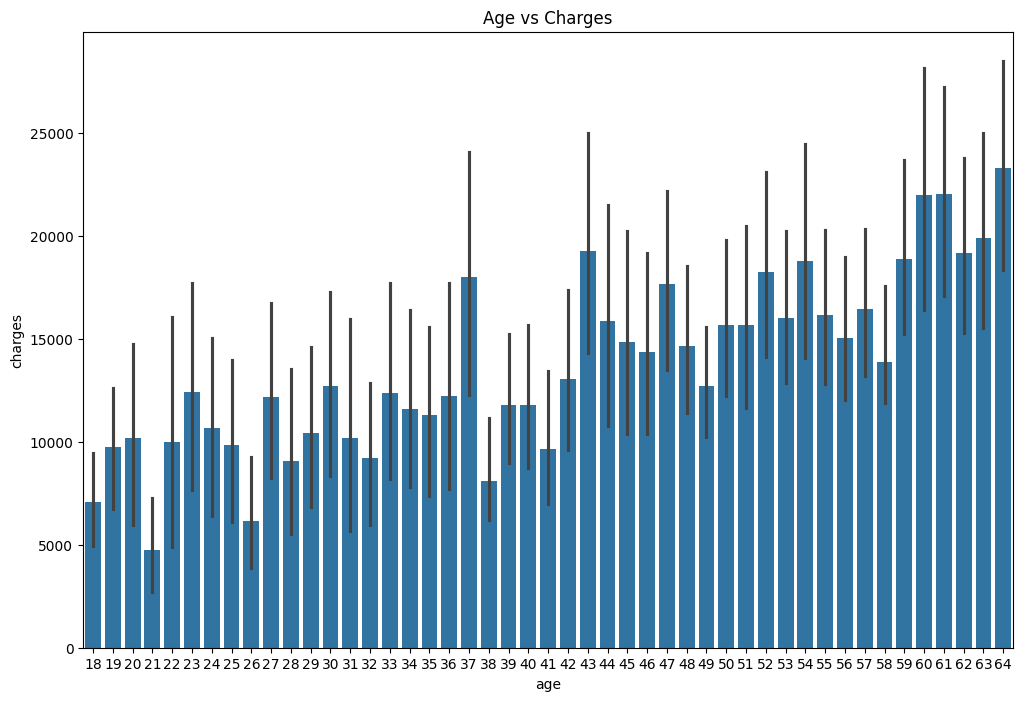

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = insdata)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

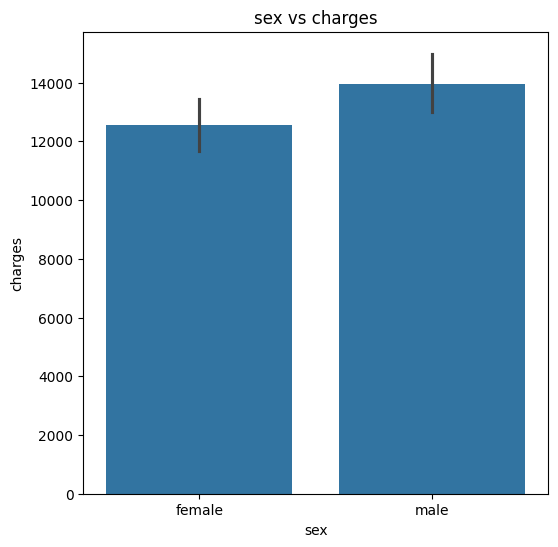

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = insdata)

plt.title('sex vs charges')


Text(0.5, 1.0, 'smoker vs charges')

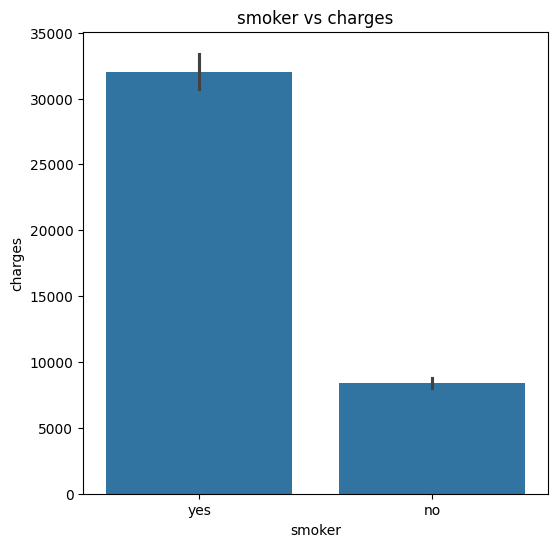

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = insdata)

plt.title('smoker vs charges')

Text(0.5, 1.0, 'region vs charges')

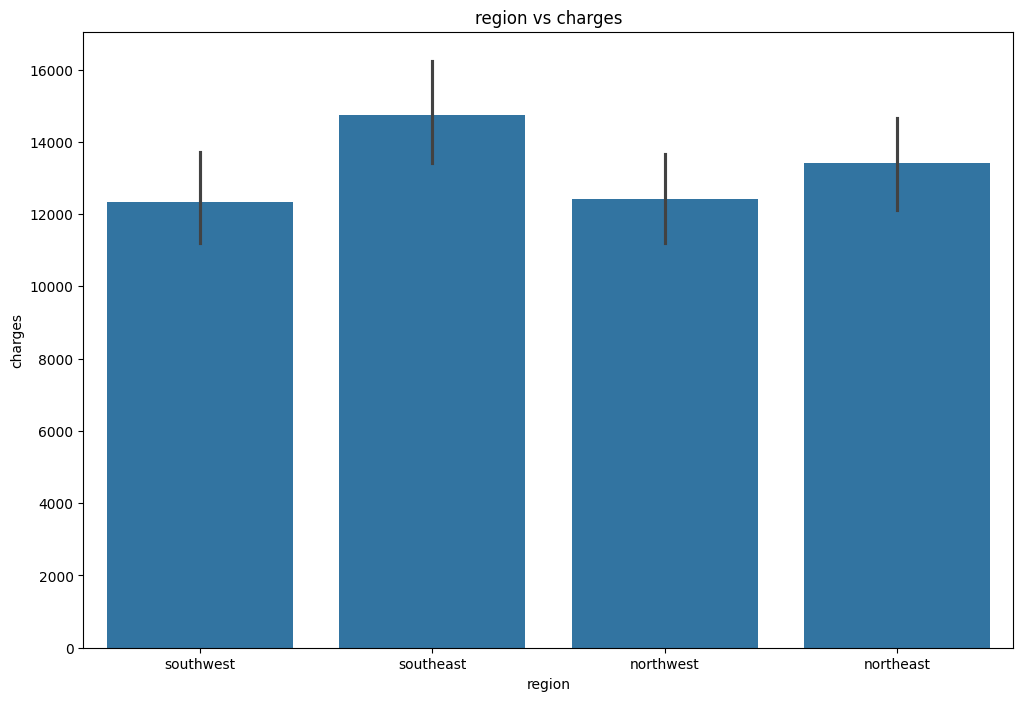

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = insdata)

plt.title('region vs charges')

## Correlation Plot

<Axes: >

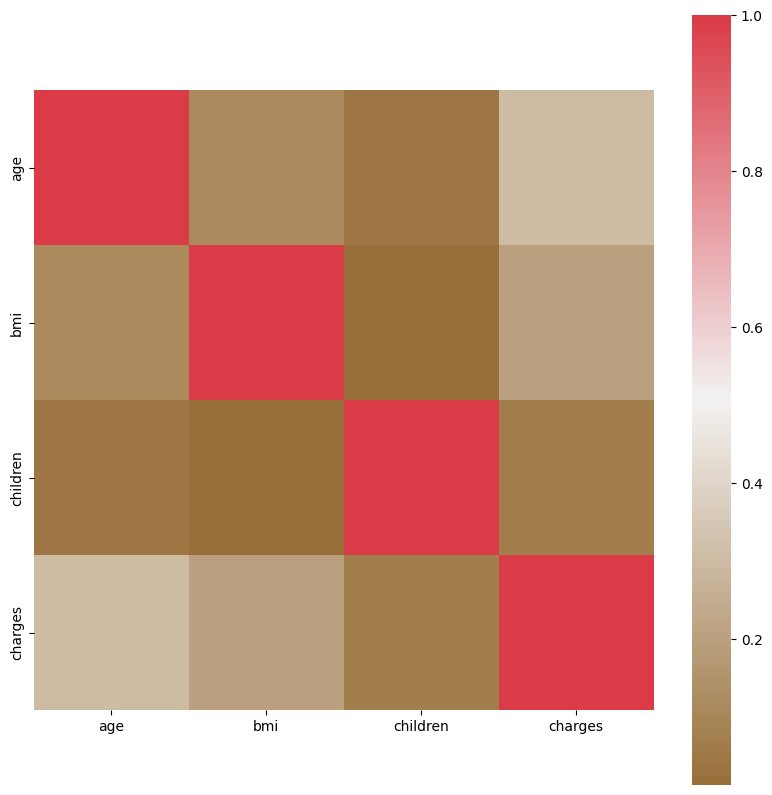

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))

corr = insdata.corr(numeric_only=True)
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax) # Changed np.bool to bool

# Data Preprocessing

In [ ]:
insdata = insdata.drop('region', axis = 1)

print(insdata.shape)
insdata.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insdata['sex'] = le.fit_transform(insdata['sex'])
insdata['smoker'] = le.fit_transform(insdata['smoker'])


In [ ]:
insdata['sex'].value_counts()

,count
sex,
1,676
0,662


In [ ]:
insdata['smoker'].value_counts()

,count
smoker,
0,1064
1,274


In [ ]:
X = insdata.drop(columns=['charges'])
y = insdata['charges']

In [ ]:
print(X.shape)
X.sample(5)

(1338, 5)


,age,sex,bmi,children,smoker
663,18,1,33.660,0,0
428,21,0,16.815,1,0
542,63,0,36.300,0,0
785,35,0,27.700,3,0
884,25,1,26.695,4,0


In [ ]:
print(y.shape)
y.tail(5)

(1338,)


,charges
1333,10600.5483
1334,2205.9808
1335,1629.8335
1336,2007.9450
1337,29141.3603


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


## Fit the Model & Predict , check the Accuracy

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

from math import sqrt

lrmodel = LinearRegression()

lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  35699244.58251515
RMSE:  5974.884482775809
R2 : 0.760858175073853


### Support Vector Machine

In [ ]:
from sklearn.svm import SVR

svrmodel = SVR()

svrmodel.fit(X_train, y_train)

y_pred = svrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  166561198.51123333
RMSE:  12905.859076839222
R2 : -0.11575887500351878


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtrmodel = DecisionTreeRegressor()

dtrmodel.fit(X_train, y_train)

y_pred = dtrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  46397755.07808918
RMSE:  6811.589761435224
R2 : 0.6891910752844026


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

rfrmodel.fit(X_train, y_train)

y_pred = rfrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  19017460.412948288
RMSE:  4360.901330338522
R2 : 0.8726059825131236


### Random Forest Model score is best with R2 score as 0.87